In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
len(data.columns)

81

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


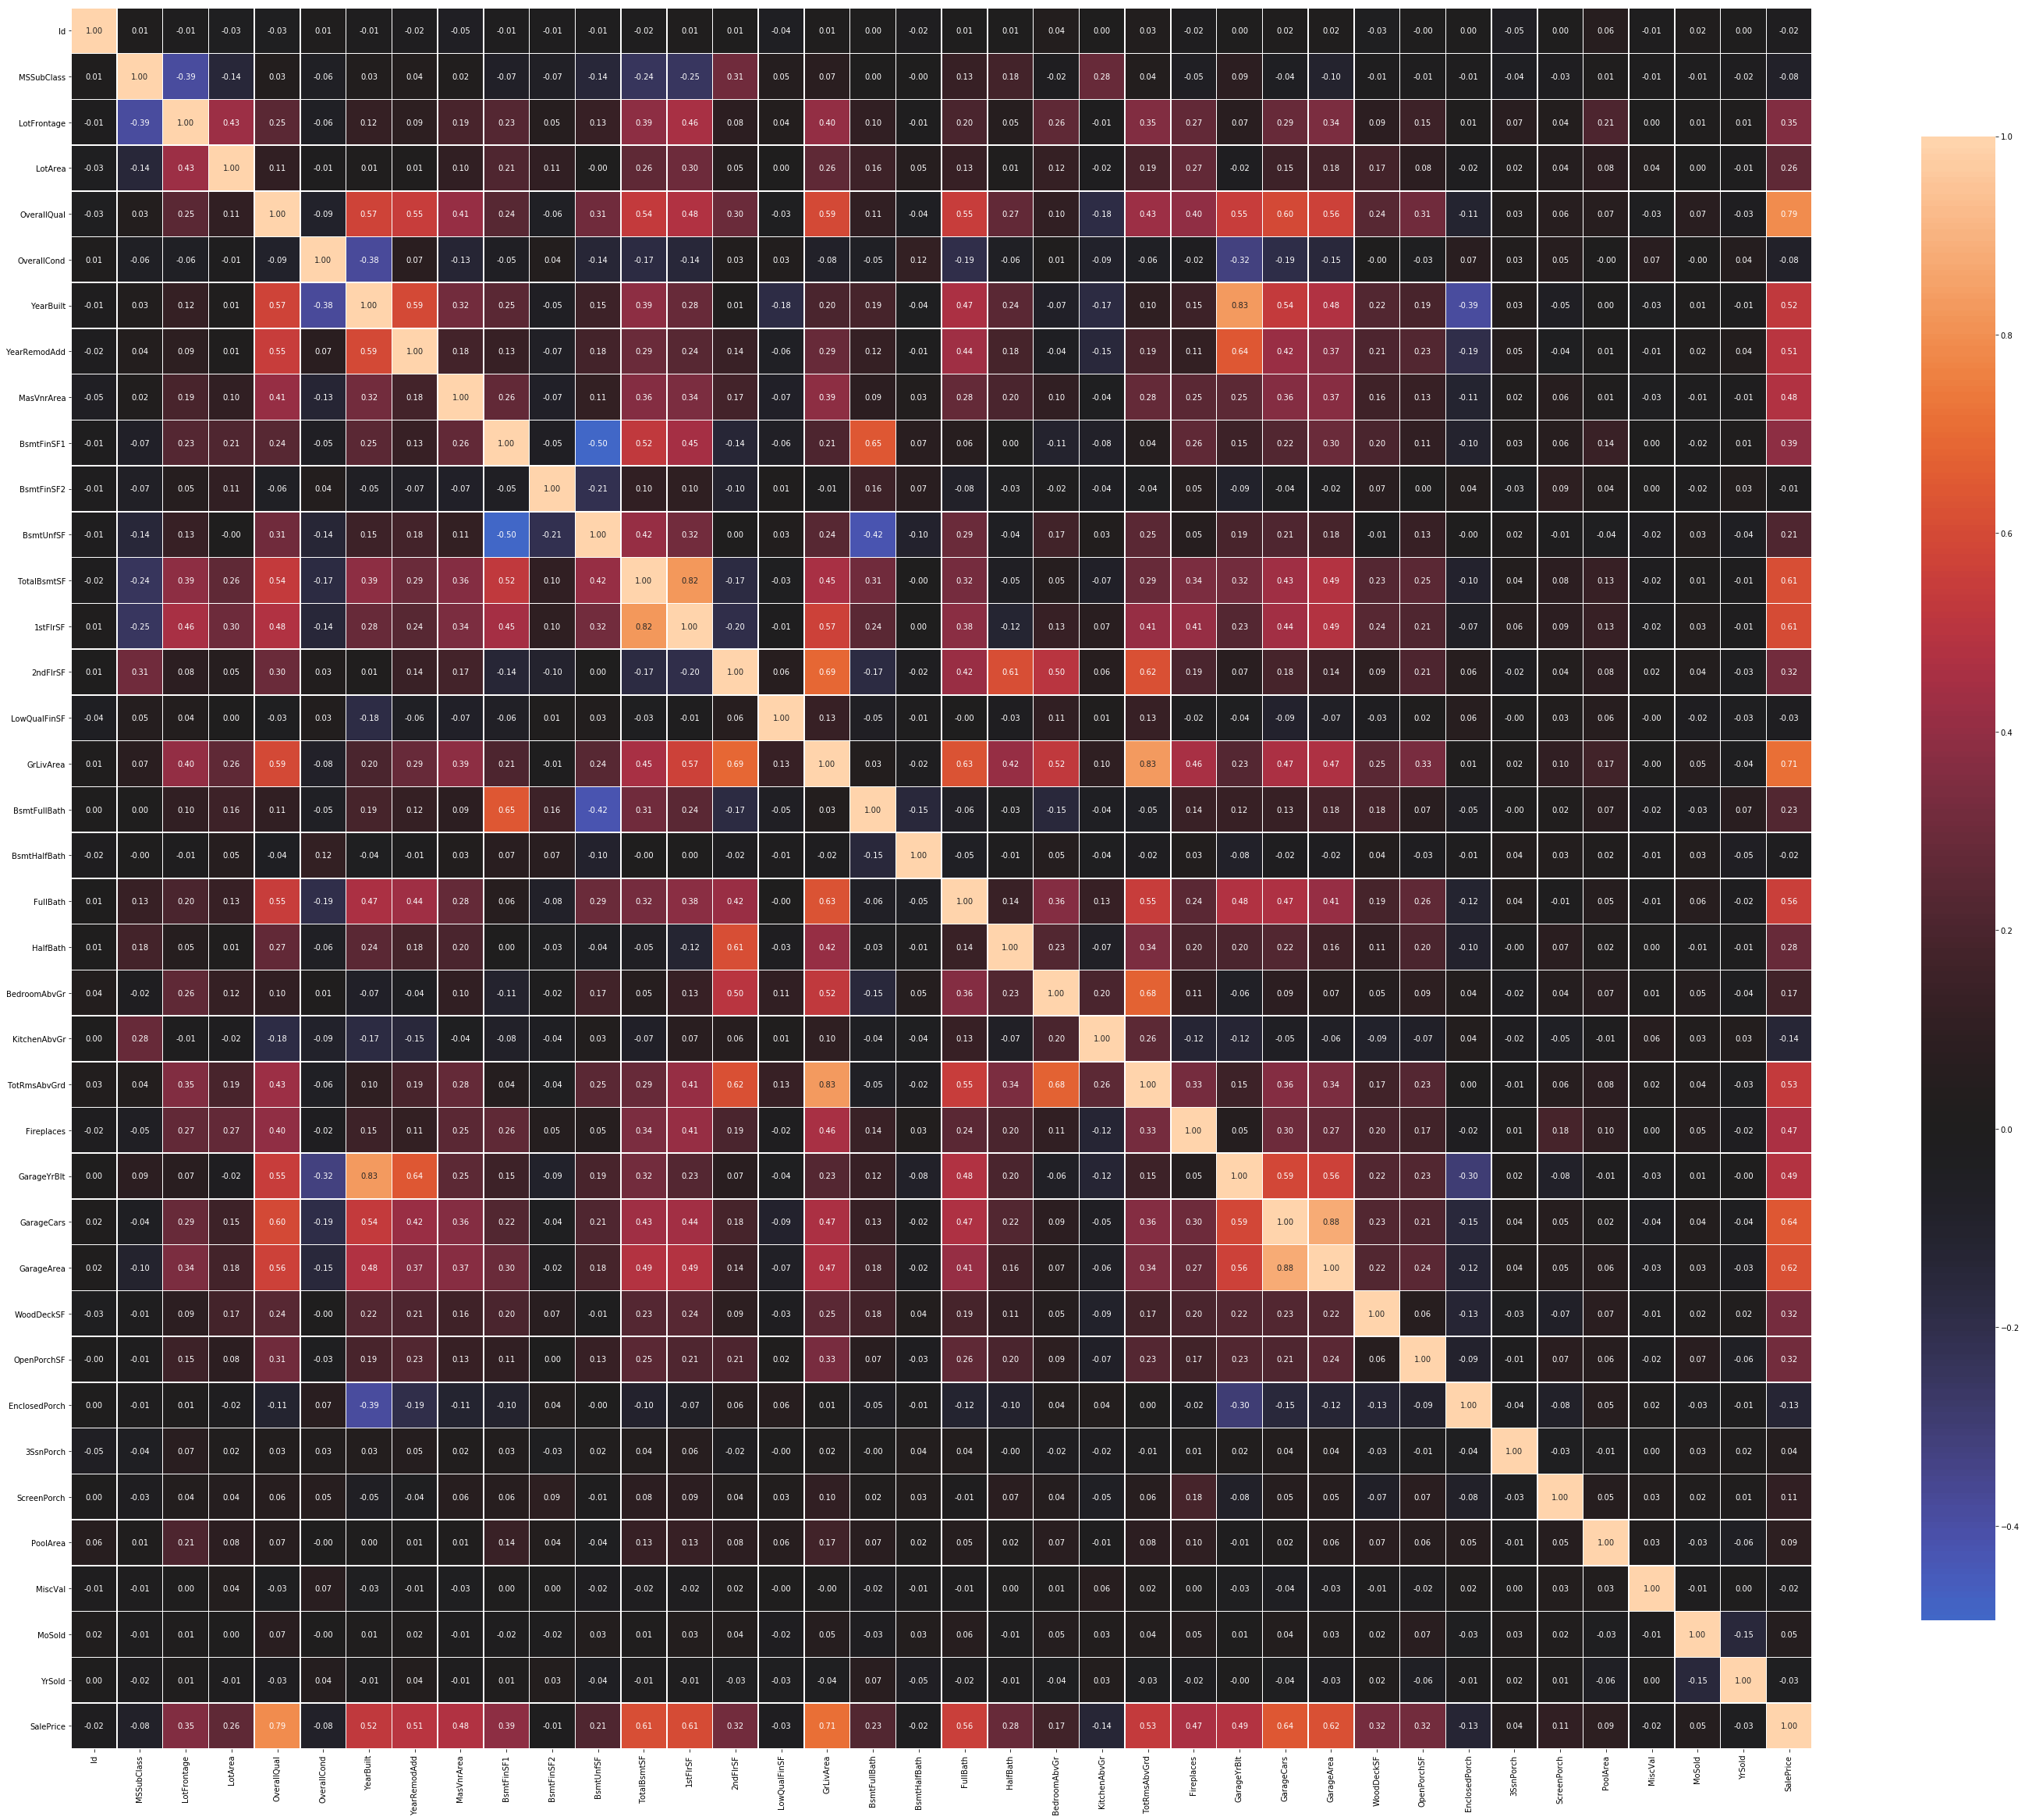

In [6]:
import seaborn as sns


def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(50,50))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data)

### Histogram to see overall Sale Prices

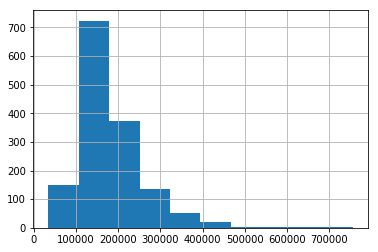

In [7]:
data['SalePrice'].hist()

### Relation between GrLivingArea and SalePrice

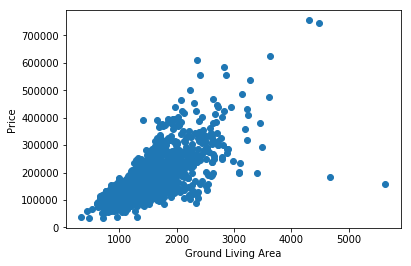

In [8]:
plt.scatter(x=data['GrLivArea'],y=data['SalePrice'])
plt.xlabel("Ground Living Area")
plt.ylabel("Price")
plt.show()

In [9]:
#OUTLIERS
data = data[data['GrLivArea'] < 3500]

### Relation between GarageArea and SalePrice

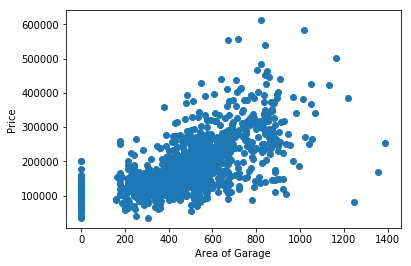

In [10]:
plt.scatter(x=data['GarageArea'],y=data['SalePrice'])
plt.xlabel("Area of Garage")
plt.ylabel("Price")
plt.show()

In [11]:
#OUTLIERS
data = data[data['GarageArea'] < 1100]

### Relation between GarageCars and SalePrice

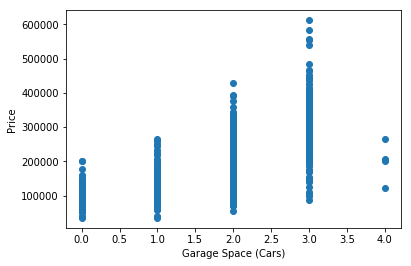

In [12]:
plt.scatter(x=data['GarageCars'],y=data['SalePrice'])
plt.xlabel("Garage Space (Cars)")
plt.ylabel("Price")
plt.show()

In [13]:
#OUTLIERS
data = data[data['GarageCars'] < 3.5]

### Relation between OverAllQual and SalePrice

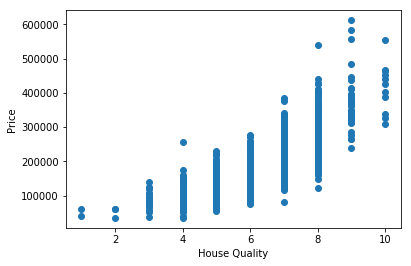

In [14]:
plt.scatter(x=data['OverallQual'],y=data['SalePrice'])
plt.xlabel("House Quality")
plt.ylabel("Price")
plt.show()

### From the visualization above it is visible that there are few outliers wrt SalePrice i.e SalePrice above 500k

In [15]:
data = data[data['SalePrice'] < 500000]

### Bar plot to see overall media between Quality and Price

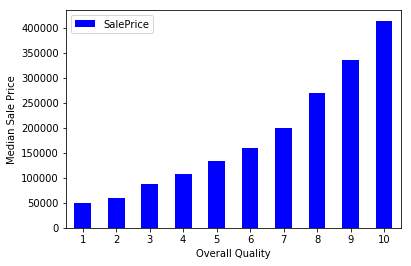

In [16]:
quality_pivot = data.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

## Till this point we have visualized the data and removed outliers from high coorelated features w.r.t SalePrice i.e corelation above 0.6

# Handle null values


## For train.csv

Text(0.5, 1.0, 'Variables with missing values')

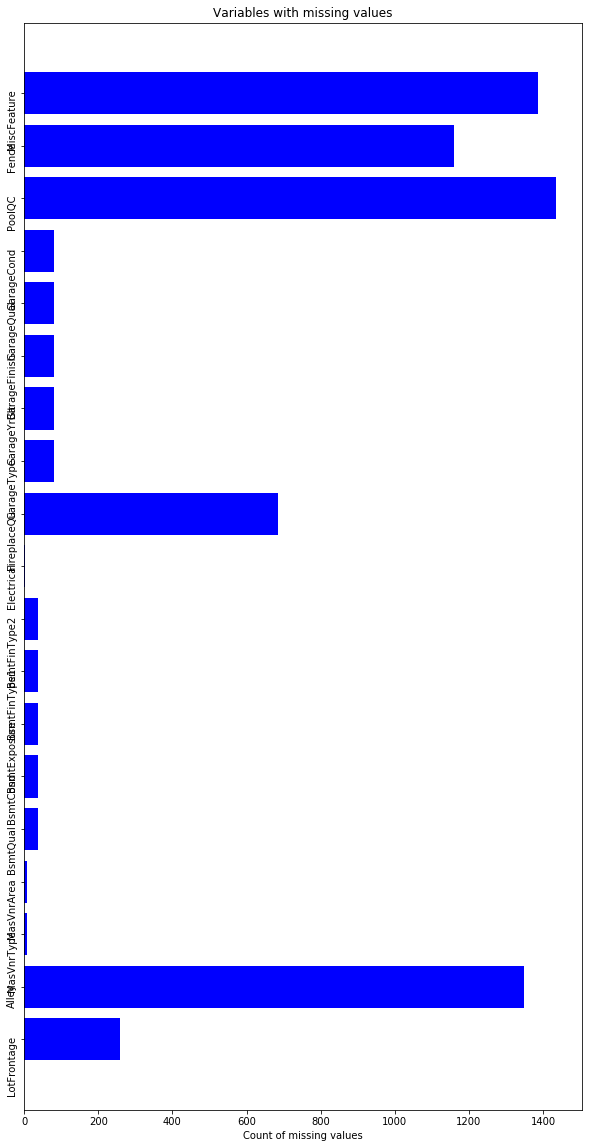

In [17]:
%matplotlib inline
labels = [] 
columns_with_missing_values = data.columns[data.isnull().any()]
valuecount = [] 
percentcount = [] 
for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(data[col].isnull().sum())
   
    percentcount.append(data[col].isnull().sum()/data.shape[0])

ind = np.arange(len(labels))
fig, (ax1) = plt.subplots(1,figsize=(10,20))
rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='vertical')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values")

In [18]:
data.isnull().sum()

Id               0   
MSSubClass       0   
MSZoning         0   
LotFrontage      258 
LotArea          0   
Street           0   
Alley            1349
LotShape         0   
LandContour      0   
Utilities        0   
LotConfig        0   
LandSlope        0   
Neighborhood     0   
Condition1       0   
Condition2       0   
BldgType         0   
HouseStyle       0   
OverallQual      0   
OverallCond      0   
YearBuilt        0   
YearRemodAdd     0   
RoofStyle        0   
RoofMatl         0   
Exterior1st      0   
Exterior2nd      0   
MasVnrType       8   
MasVnrArea       8   
ExterQual        0   
ExterCond        0   
Foundation       0   
BsmtQual         37  
BsmtCond         37  
BsmtExposure     38  
BsmtFinType1     37  
BsmtFinSF1       0   
BsmtFinType2     38  
BsmtFinSF2       0   
BsmtUnfSF        0   
TotalBsmtSF      0   
Heating          0   
HeatingQC        0   
CentralAir       0   
Electrical       1   
1stFlrSF         0   
2ndFlrSF         0   
LowQualFin

In [19]:
data.isnull().sum().sum()

6883

In [20]:
data = data.dropna(thresh=(len(data)-600),axis=1)

In [21]:
data.isnull().sum()

Id               0  
MSSubClass       0  
MSZoning         0  
LotFrontage      258
LotArea          0  
Street           0  
LotShape         0  
LandContour      0  
Utilities        0  
LotConfig        0  
LandSlope        0  
Neighborhood     0  
Condition1       0  
Condition2       0  
BldgType         0  
HouseStyle       0  
OverallQual      0  
OverallCond      0  
YearBuilt        0  
YearRemodAdd     0  
RoofStyle        0  
RoofMatl         0  
Exterior1st      0  
Exterior2nd      0  
MasVnrType       8  
MasVnrArea       8  
ExterQual        0  
ExterCond        0  
Foundation       0  
BsmtQual         37 
BsmtCond         37 
BsmtExposure     38 
BsmtFinType1     37 
BsmtFinSF1       0  
BsmtFinType2     38 
BsmtFinSF2       0  
BsmtUnfSF        0  
TotalBsmtSF      0  
Heating          0  
HeatingQC        0  
CentralAir       0  
Electrical       1  
1stFlrSF         0  
2ndFlrSF         0  
LowQualFinSF     0  
GrLivArea        0  
BsmtFullBath     0  
BsmtHalfBath 

### Till this part I have removed the columns which have around 50% missing values, I will now fill rest of the missing values.

### Since LotFrontage and MasVnrArea is a float feature filling it with its mean makes more sense.

In [22]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

### Remainig columns are label/category based therefore filling them with mode.

In [23]:
category_columns = ['Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType']
for i in category_columns:
    data[i] = data[i].fillna(data[i].mode()[0])
    
data.drop(['GarageYrBlt'],axis=1,inplace=True)
data.drop(['Id'],axis=1,inplace=True)

In [24]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [25]:
data.isnull().sum().sum()

0

## Mask categorical data

In [26]:
data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
columnsToEncode = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
counts = []
for i in columnsToEncode:
    counts.append(data[i].value_counts())
    print(data[i].value_counts())

RL         1134
RM         215 
FV         65  
RH         16  
C (all)    9   
Name: MSZoning, dtype: int64
Pave    1434
Grvl    5   
Name: Street, dtype: int64
Reg    916
IR1    476
IR2    38 
IR3    9  
Name: LotShape, dtype: int64
Lvl    1295
Bnk    61  
HLS    49  
Low    34  
Name: LandContour, dtype: int64
AllPub    1438
NoSeWa    1   
Name: Utilities, dtype: int64
Inside     1039
Corner     259 
CulDSac    90  
FR2        47  
FR3        4   
Name: LotConfig, dtype: int64
Gtl    1363
Mod    63  
Sev    13  
Name: LandSlope, dtype: int64
NAmes      223
CollgCr    150
OldTown    111
Edwards    98 
Somerst    85 
Gilbert    79 
Sawyer     74 
NWAmes     73 
NridgHt    72 
SawyerW    59 
BrkSide    58 
Crawfor    51 
Mitchel    47 
NoRidge    38 
Timber     38 
IDOTRR     36 
ClearCr    28 
SWISU      25 
StoneBr    22 
Blmngtn    17 
MeadowV    17 
BrDale     16 
Veenker    11 
NPkVill    9  
Blueste    2  
Name: Neighborhood, dtype: int64
Norm      1245
Feedr     80  
Artery    4

In [28]:
mask = []
thresh = 150
for i in range(0,len(columnsToEncode)):
    mask.append(data[columnsToEncode[i]].isin(counts[i][counts[i]<thresh].index))

In [29]:
for i in range(0,len(columnsToEncode)):
    data[columnsToEncode[i]][mask[i]] = 'Other'

c:\users\danial ahmed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
for i in columnsToEncode:
    print(data[i].value_counts())

RL       1134
RM       215 
Other    90  
Name: MSZoning, dtype: int64
Pave     1434
Other    5   
Name: Street, dtype: int64
Reg      916
IR1      476
Other    47 
Name: LotShape, dtype: int64
Lvl      1295
Other    144 
Name: LandContour, dtype: int64
AllPub    1438
Other     1   
Name: Utilities, dtype: int64
Inside    1039
Corner    259 
Other     141 
Name: LotConfig, dtype: int64
Gtl      1363
Other    76  
Name: LandSlope, dtype: int64
Other      1066
NAmes      223 
CollgCr    150 
Name: Neighborhood, dtype: int64
Norm     1245
Other    194 
Name: Condition1, dtype: int64
Norm     1426
Other    13  
Name: Condition2, dtype: int64
1Fam     1202
Other    237 
Name: BldgType, dtype: int64
1Story    717
2Story    435
1.5Fin    154
Other     133
Name: HouseStyle, dtype: int64
Gable    1133
Hip      274 
Other    32  
Name: RoofStyle, dtype: int64
CompShg    1416
Other      23  
Name: RoofMatl, dtype: int64
VinylSd    508
Other      291
HdBoard    220
MetalSd    216
Wd Sdng    204
Na

# For test.csv

In [31]:
data_test = pd.read_csv("test.csv")

In [32]:
data_test.isnull().sum()

Id               0   
MSSubClass       0   
MSZoning         4   
LotFrontage      227 
LotArea          0   
Street           0   
Alley            1352
LotShape         0   
LandContour      0   
Utilities        2   
LotConfig        0   
LandSlope        0   
Neighborhood     0   
Condition1       0   
Condition2       0   
BldgType         0   
HouseStyle       0   
OverallQual      0   
OverallCond      0   
YearBuilt        0   
YearRemodAdd     0   
RoofStyle        0   
RoofMatl         0   
Exterior1st      1   
Exterior2nd      1   
MasVnrType       16  
MasVnrArea       15  
ExterQual        0   
ExterCond        0   
Foundation       0   
BsmtQual         44  
BsmtCond         45  
BsmtExposure     44  
BsmtFinType1     42  
BsmtFinSF1       1   
BsmtFinType2     42  
BsmtFinSF2       1   
BsmtUnfSF        1   
TotalBsmtSF      1   
Heating          0   
HeatingQC        0   
CentralAir       0   
Electrical       0   
1stFlrSF         0   
2ndFlrSF         0   
LowQualFin

In [33]:
data_test.shape

(1459, 80)

In [34]:
data_test = data_test.dropna(thresh=(len(data_test)-600),axis=1)

In [35]:
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].mean())
data_test['MasVnrArea'] = data_test['MasVnrArea'].fillna(data_test['MasVnrArea'].mean())

In [36]:
category_columns = ['BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType','Exterior2nd','BsmtFinSF1','Utilities','Exterior1st','MSZoning','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType']
for i in category_columns:
    data_test[i] = data_test[i].fillna(data_test[i].mode()[0])

In [37]:
data_test.drop(['GarageYrBlt'],axis=1,inplace=True)
data_test.drop(['Id'],axis=1,inplace=True)

In [38]:
data_test.isnull().sum().sum()

0

In [39]:
columnsToEncode = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
counts = []
for i in columnsToEncode:
    counts.append(data_test[i].value_counts())
    print(data_test[i].value_counts())

RL         1118
RM         242 
FV         74  
C (all)    15  
RH         10  
Name: MSZoning, dtype: int64
Pave    1453
Grvl    6   
Name: Street, dtype: int64
Reg    934
IR1    484
IR2    35 
IR3    6  
Name: LotShape, dtype: int64
Lvl    1311
HLS    70  
Bnk    54  
Low    24  
Name: LandContour, dtype: int64
AllPub    1459
Name: Utilities, dtype: int64
Inside     1081
Corner     248 
CulDSac    82  
FR2        38  
FR3        10  
Name: LotConfig, dtype: int64
Gtl    1396
Mod    60  
Sev    3   
Name: LandSlope, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst    96 
Edwards    94 
NridgHt    89 
Gilbert    86 
Sawyer     77 
SawyerW    66 
Mitchel    65 
NWAmes     58 
IDOTRR     56 
Crawfor    52 
BrkSide    50 
Timber     34 
NoRidge    30 
StoneBr    26 
SWISU      23 
MeadowV    20 
ClearCr    16 
BrDale     14 
NPkVill    14 
Veenker    13 
Blmngtn    11 
Blueste    8  
Name: Neighborhood, dtype: int64
Norm      1251
Feedr     83  
Artery    44  
RRAn      2

In [40]:
mask = []
thresh = 150
for i in range(0,len(columnsToEncode)):
    mask.append(data_test[columnsToEncode[i]].isin(counts[i][counts[i]<thresh].index))

In [41]:
for i in range(0,len(columnsToEncode)):
    data_test[columnsToEncode[i]][mask[i]] = 'Other'

c:\users\danial ahmed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## One Hot Encode Categorical data

### Some values and columns are not same in train and test datasets, therefore I need to hot encode both of them together and delete all the non-similar data.

### Encoding Train Data

In [42]:
data_train = pd.get_dummies(data,columns=columnsToEncode,prefix=columnsToEncode)

### Encoding Test Data

In [43]:
data_test = pd.get_dummies(data_test,columns=columnsToEncode,prefix=columnsToEncode)

### Finding non-similar data.

In [44]:
columns_train = data_train.columns.tolist()
columns_test = data_test.columns.tolist()
print(len(columns_train))
print(len(columns_test))
for i in range(0,len(columns_train)):
    if columns_test[i] not in columns_train:
        print("Test: " + columns_test[i])
    if columns_train[i] not in columns_test:
        print("Train: " + columns_train[i])

137
137
Train: SalePrice
Train: Utilities_Other
Train: Neighborhood_CollgCr
Test: ExterCond_Gd
Test: Foundation_BrkTil
Test: BsmtFinType1_Rec


In [45]:
data_train = data_train.drop(columns=['Utilities_Other','Neighborhood_CollgCr'])
data_test = data_test.drop(columns=['ExterCond_Gd','Foundation_BrkTil','BsmtFinType1_Rec'])

In [46]:
columns_train = data_train.columns.tolist()
columns_test = data_test.columns.tolist()
print(len(columns_train))
print(len(columns_test))
for i in range(0,len(columns_test)):
    if columns_test[i] not in columns_train:
        print("Test: " + columns_test[i])
    if columns_train[i] not in columns_test:
        print("Train: " + columns_train[i])

135
134
Train: SalePrice


## Transform and normalize remainig columns to Scalar

In [47]:
data_train.dtypes

MSSubClass              int64  
LotFrontage             float64
LotArea                 int64  
OverallQual             int64  
OverallCond             int64  
YearBuilt               int64  
YearRemodAdd            int64  
MasVnrArea              float64
BsmtFinSF1              int64  
BsmtFinSF2              int64  
BsmtUnfSF               int64  
TotalBsmtSF             int64  
1stFlrSF                int64  
2ndFlrSF                int64  
LowQualFinSF            int64  
GrLivArea               int64  
BsmtFullBath            int64  
BsmtHalfBath            int64  
FullBath                int64  
HalfBath                int64  
BedroomAbvGr            int64  
KitchenAbvGr            int64  
TotRmsAbvGrd            int64  
Fireplaces              int64  
GarageCars              int64  
GarageArea              int64  
WoodDeckSF              int64  
OpenPorchSF             int64  
EnclosedPorch           int64  
3SsnPorch               int64  
ScreenPorch             int64  
PoolArea

In [48]:
nonCat_columns = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

In [49]:
for i in nonCat_columns:
    scl.fit(data_train[[i]])
    data_train[i] = scl.transform(data_train[[i]])
    scl.fit(data_test[[i]])
    data_test[i] = scl.transform(data_test[[i]])

In [50]:
data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_Other,MSZoning_RL,MSZoning_RM,Street_Other,Street_Pave,LotShape_IR1,LotShape_Other,LotShape_Reg,LandContour_Lvl,LandContour_Other,Utilities_AllPub,LotConfig_Corner,LotConfig_Inside,LotConfig_Other,LandSlope_Gtl,LandSlope_Other,Neighborhood_NAmes,Neighborhood_Other,Condition1_Norm,Condition1_Other,Condition2_Norm,Condition2_Other,BldgType_1Fam,BldgType_Other,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Other,RoofMatl_CompShg,RoofMatl_Other,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Other,ExterQual_Gd,ExterQual_Other,ExterQual_TA,ExterCond_Other,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtQual_Other,BsmtQual_TA,BsmtCond_Other,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_No,BsmtExposure_Other,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Other,BsmtFinType1_Unf,BsmtFinType2_Other,BsmtFinType2_Unf,Heating_GasA,Heating_Other,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,CentralAir_Other,CentralAir_Y,Electrical_Other,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_Other,KitchenQual_TA,Functional_Other,Functional_Typ,GarageType_Attchd,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Other,GarageQual_TA,GarageCond_Other,GarageCond_TA,PavedDrive_Other,PavedDrive_Y,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other
0,60,0.150685,0.033420,0.666667,0.500,2003,2003,0.12250,0.375532,0.0,0.064212,0.266999,0.180373,0.469747,0.0,0.435581,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.666667,0.512629,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,2008,208500,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0
1,20,0.202055,0.038795,0.555556,0.875,1976,1976,0.00000,0.520213,0.0,0.121575,0.393637,0.320663,0.000000,0.0,0.293764,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.666667,0.430309,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,2007,181500,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0
2,60,0.160959,0.046507,0.666667,0.500,2001,2002,0.10125,0.258511,0.0,0.185788,0.286962,0.202488,0.476348,0.0,0.459639,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.666667,0.568756,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,2008,223500,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0
3,70,0.133562,0.038561,0.666667,0.500,1915,1970,0.00000,0.114894,0.0,0.231164,0.235808,0.216655,0.415842,0.0,0.437797,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,1.000000,0.600561,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,2006,140000,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1
4,60,0.215753,0.060576,0.777778,0.500,2000,2000,0.21875,0.348404,0.0,0.209760,0.357143,0.280235,0.579208,0.0,0.590060,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,1.

In [51]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 1459
Columns: 135 entries, MSSubClass to SaleCondition_Other
dtypes: float64(31), int64(5), uint8(99)
memory usage: 555.1 KB


In [52]:
data_train.to_csv('clean_train.csv')
data_test.to_csv('clean_test.csv')